# Objective Function

In [1]:
import numpy as np
import pandas as pd
from typing import Tuple
def evalfunc(portfolio: np.ndarray, ret: np.ndarray, pi: float, theta: float) -> float:
    """
    Task 1: the objective function
    (Remember to vectorize as much as possible)


    Parameters
    --------------
    portfolio: np.ndarray: the portfolio vector i.e. x

    ret: np.ndarray: the (T, 3) numpy array containing all asset returns

    pi: float: the exponent parameter of the objective

    theta: the risk-aversion parameter of the objective


    Returns
    --------------
    float: the objective value.
    """
    # compute mean returns first. ret_mu shape should be (3,)
    ret_mu = ret.mean(axis=0)

    # first part
    drift = -ret_mu.dot(portfolio)

    # second part
    # weighed deviation from mean (part within []^pi)
    deviation = (ret - ret_mu).dot(portfolio)
    risk = theta * (
        (np.abs(deviation)**pi).mean()
    )
    return drift + risk

# Gradient

Following matrix notations, the objective function can be rewritten as
\begin{align*}
	\text{minimize} \ -\bar{\textbf{r}}'\textbf{x}
	+
	\frac{\theta}{T}
		||
			(\textbf{r} - \bar{\textbf{r}})'\textbf{x}
		||_{\pi}^{\pi}
\end{align*}
where $||\cdot||_\pi$ is the $L^\pi$ norm. Here we must investigate how to take the derivative of a $L^p$ norm with respect to the function argument. According to
[Wikipedia - Norm](https://en.wikipedia.org/wiki/Norm_(mathematics)),

\begin{align*}
\frac{\partial ||\textbf{x}||_p}{\partial \textbf{x}}&=\frac{\textbf{x}\circ |\textbf{x}|^{p-2}}{||\textbf{x}||_p^{p-1}}\\
\implies 
\frac{\partial ||\textbf{x}||_p^p}{\partial \textbf{x}}&=p\cdot||\textbf{x}||_p^{p-1}\cdot\frac{\textbf{x}\circ |\textbf{x}|^{p-2}}{||\textbf{x}||_p^{p-1}}\\
&=p\cdot \textbf{x}\circ |\textbf{x}|^{p-2}
\end{align*}
where $\circ$ is element-wise matrix multiplication, and $|\textbf{x}| = (|x_1|, \ldots, |x_n|)$ is the element-wise absolute value. In other words, 
\begin{align*}
\textbf{x}\circ |\textbf{x}|^{p-2}&=[x_1,\ldots, x_n]\circ [|x_1|^{p-2},\ldots, |x_n|^{p-2}]\\
&=[(x_1\cdot |x_1|^{p-2}),\ldots, (x_n\cdot |x_n|^{p-2})]
\end{align*}
Therefore, if we were to take derivative of the objective function with respect to $\textbf{x}$ can be obtained via chain rule:
\begin{align*}
\frac{\partial \text{obj}}{\partial \textbf{x}}
&=-\bar{\textbf{r}} + \frac{\pi\theta}{T}\cdot [(\textbf{r} - \bar{\textbf{r}})'\textbf{x}]\circ |(\textbf{r} - \bar{\textbf{r}})'\textbf{x}|^{\pi -2}\cdot (\textbf{r}-\bar{\textbf{r}})
\end{align*}

In [2]:
def evalgrad(portfolio: np.ndarray, ret: np.ndarray, pi: float, theta: float) -> np.ndarray:
    """
    Task 1: the objective function gradient


    Parameters
    --------------
    portfolio: np.ndarray: the portfolio vector i.e. x

    ret: np.ndarray: the (T, 3) numpy array containing all asset returns

    pi: float: the exponent parameter of the objective

    theta: the risk-aversion parameter of the objective


    Returns
    --------------
    float: the objective gradient vector
    """
    T = ret.shape[0]
    ret_mu = ret.mean(axis=0)
    delta = ret - ret_mu
    dev = delta.dot(portfolio)
    nom = dev * dev**(pi-2)
    return -ret_mu + (
        (theta * pi/ T)*nom
    ).dot(delta)


# Data processing

In [3]:
pd.read_csv("../dataforh4/ABR.csv",low_memory=False)

,BarTp,Trade,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,BarTp.1,...,Unnamed: 16,Unnamed: 17,BarTp.2,Ask,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABR US Equity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABR US Equity,...,NaN,NaN,ABR US Equity,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dates,Open,Close,High,Low,Value,Volume,Number Ticks,NaN,Dates,...,Number Ticks,NaN,Dates,Open,Close,High,Low,Value,Volume,Number Ticks
3,2021-02-01 09:30:00,14.39,14.3601,14.44,14.3601,253092,17587,5,NaN,2021-02-01 03:59:01,...,2,NaN,2021-02-01 03:59:01,15.73,15.73,15.73,15.73,31.46,2,1
4,2021-02-01 09:31:00,14.36,14.35,14.36,14.35,11743.3008,818,4,NaN,2021-02-01 06:59:01,...,2,NaN,2021-02-01 06:59:01,15.72,14.7,15.72,14.7,807.32,54,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-13 16:45:00,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-13 16:54:00,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-13 18:32:00,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-13 18:57:00,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
import pandas as pd
import datetime

def is_open_or_noon(dt: datetime.datetime) -> bool:
    """Task 1: read helper function for datetime parsing"""
    t = dt.time()
    return t == datetime.time(9,30) or t == datetime.time(12,0)

def is_open(dt:datetime.datetime) -> bool:
    """Task 1: read helper function for datetime parsing"""
    return dt.time() == datetime.time(9,30)

def my_dt_parser(s: str) -> datetime.datetime:
    """Task 1: custom datetime parser. 5x faster than pd.to_datetime"""
    # 2021-02-01 09:30:00
    date, time = s.split()
    if "/" in date:
        m, d, y = date.split("/")
        year = 2000 + int(y)
    elif "-" in date:
        y, m, d = date.split("-")
        year = int(y)
    else:
        raise Exception("DATETIME PARSING ERROR!")

    HM = time.split(":")
    H, M = HM[0], HM[1]
    return datetime.datetime(
        year = year,
        month = int(m),
        day = int(d),
        hour = int(H),
        minute = int(M)
    )

def read_asset(asset:str, data_dir: str="../dataforh4/") -> pd.DataFrame:
    """
    Task 1: reads a single asset.


    Parameters
    --------------
    asset: str: asset name

    data_dir: str: local data directory


    Returns
    --------------
    pd.DataFrame: pandas dataframe containing asset returns and price
    """
    csv_path = data_dir + asset + ".csv"
    df = pd.read_csv(csv_path, low_memory=False, header=3).loc[:, ["Dates", "Close"]]
    df = df.iloc[:df["Close"].isna().argmax()]

    # deal with first row missing date
    df.loc[0,"Dates"] = df.loc[1,"Dates"].replace("31", "30")
    if asset == 'AMZN':
        df.loc[df['Dates'] == '4/20/21 12:01', 'Dates'] = '4/20/21 12:00'
        df.loc[df['Dates'] == '6/14/21 12:01', 'Dates'] = '6/14/21 12:00'
    if asset == 'ABR':
        df.loc[df['Dates'] == '2021-02-01 12:01:00', 'Dates'] = '2021-02-01 12:00:00'
        df.loc[df['Dates'] == '2021-02-03 12:01:00', 'Dates'] = '2021-02-03 12:00:00'
        df.loc[df['Dates'] == '2021-02-18 12:01:00', 'Dates'] = '2021-02-18 12:00:00'
        df.loc[df['Dates'] == '2021-03-02 12:01:00', 'Dates'] = '2021-03-02 12:00:00'
        df.loc[df['Dates'] == '2021-03-08 12:01:00', 'Dates'] = '2021-03-08 12:00:00'
        df.loc[df['Dates'] == '2021-03-23 12:01:00', 'Dates'] = '2021-03-23 12:00:00'
        df.loc[df['Dates'] == '2021-06-04 12:01:00', 'Dates'] = '2021-06-04 12:00:00'
        df.loc[df['Dates'] == '2021-06-16 12:01:00', 'Dates'] = '2021-06-16 12:00:00'
    if asset == 'UBS':
        df.loc[df['Dates'] == '2021-02-02 12:01:00', 'Dates'] = '2021-02-02 12:00:00'
        df.loc[df['Dates'] == '2021-02-04 12:01:00', 'Dates'] = '2021-02-04 12:00:00'
        df.loc[df['Dates'] == '2021-02-11 12:01:00', 'Dates'] = '2021-02-11 12:00:00'
        df.loc[df['Dates'] == '2021-02-18 12:01:00', 'Dates'] = '2021-02-18 12:00:00'
        df.loc[df['Dates'] == '2021-02-19 12:01:00', 'Dates'] = '2021-02-19 12:00:00'
        df.loc[df['Dates'] == '2021-03-26 12:01:00', 'Dates'] = '2021-03-26 12:00:00'
        df.loc[df['Dates'] == '2021-03-31 12:02:00', 'Dates'] = '2021-03-31 12:00:00'
        df.loc[df['Dates'] == '2021-04-06 12:01:00', 'Dates'] = '2021-04-06 12:00:00'
        df.loc[df['Dates'] == '2021-04-19 12:01:00', 'Dates'] = '2021-04-19 12:00:00'
        df.loc[df['Dates'] == '2021-04-30 12:05:00', 'Dates'] = '2021-04-30 12:00:00'
        df.loc[df['Dates'] == '2021-07-23 12:01:00', 'Dates'] = '2021-07-23 12:00:00'
        
    # extract open or noon data
    df["dt"] = df["Dates"].apply(my_dt_parser)
    df["Date"] = df["dt"].apply(lambda dt: dt.date())
    open_or_noon = df["dt"].apply(is_open_or_noon)
    df = df.loc[open_or_noon]

    # compute daily return
    ret = df.loc[:, ["Close","Date"]].groupby("Date").apply(
        lambda x: x["Close"].iloc[1]/x["Close"].iloc[0]-1).values

    ret = ret[~np.isnan(ret)]

    # Return along with daily open price
    df = df.loc[df["dt"].apply(is_open)]
    df["ret"] = ret

    df.set_index("Date", inplace=True)
    df = df[["ret", "Close"]]
    df.rename(columns={"ret": f"{asset}_ret", "Close": f"{asset}_price"}, inplace=True)

    return df

assets = ["ABR", "AMZN", "GS", "NFLX", "NIO", "NVDA", "TSLA", "UBS"]

for a in assets:
    asset = read_asset(a)
    print("Name:", a)
    print(asset)
    print()

Name: ABR
             ABR_ret  ABR_price
Date                           
2021-02-01 -0.011845    14.3601
2021-02-02  0.014195    14.5830
2021-02-03  0.001273    14.8500
2021-02-04  0.034797    14.8000
2021-02-05 -0.002571    15.5600
...              ...        ...
2021-08-09  0.007619    18.2311
2021-08-10  0.006014    18.2900
2021-08-11 -0.004968    18.6200
2021-08-12 -0.005870    18.7400
2021-08-13 -0.000545    18.3600

[136 rows x 2 columns]

Name: AMZN
            AMZN_ret  AMZN_price
Date                            
2021-01-04 -0.027139     3262.80
2021-01-05  0.006993     3174.80
2021-01-06  0.010673     3146.17
2021-01-07  0.010303     3162.20
2021-01-08 -0.005051     3173.77
...              ...         ...
2021-07-07 -0.004655     3729.24
2021-07-08  0.004955     3652.90
2021-07-09  0.002678     3718.54
2021-07-12 -0.011032     3746.21
2021-07-13  0.011858     3708.82

[132 rows x 2 columns]

Name: GS
              GS_ret  GS_price
Date                          
2021-01-11  0

In [5]:
def read_all(data_dir: str = "../dataforh4/", T: int = 100) -> Tuple[pd.DataFrame,pd.DataFrame]:
    """
    Task 1.5: reads all asset returns and sever into train and test.


    Parameters
    --------------
    data_dir: str: local data directory

    T: int: size of the traning period.


    Returns
    --------------
    Tuple[pd.DataFrame, pd.DataFrame]: train and test pandas dataframe containing returns and prices
    """
    assets = ["ABR", "AMZN", "GS", "NFLX", "NIO", "NVDA", "TSLA", "UBS"]

    dfs = [read_asset(asset, data_dir) for asset in assets]

    df = dfs[0]
    for i in range(1, len(assets)):
        df = df.join(dfs[i])

    print(df)
    print()
    df = df.dropna()
    print('There are total {} valid dates for 8 assets'.format(df.shape[0]))
    return df.iloc[:T], df.iloc[T:]

train, test = read_all()
train

             ABR_ret  ABR_price  AMZN_ret  AMZN_price    GS_ret  GS_price  \
Date                                                                        
2021-02-01 -0.011845    14.3601  0.015982     3248.56  0.007047   272.460   
2021-02-02  0.014195    14.5830 -0.000326     3400.00  0.017026   279.580   
2021-02-03  0.001273    14.8500 -0.006972     3413.86  0.003241   286.950   
2021-02-04  0.034797    14.8000 -0.001582     3324.26  0.014105   290.325   
2021-02-05 -0.002571    15.5600  0.004461     3318.00 -0.005064   295.225   
...              ...        ...       ...         ...       ...       ...   
2021-08-09  0.007619    18.2311       NaN         NaN       NaN       NaN   
2021-08-10  0.006014    18.2900       NaN         NaN       NaN       NaN   
2021-08-11 -0.004968    18.6200       NaN         NaN       NaN       NaN   
2021-08-12 -0.005870    18.7400       NaN         NaN       NaN       NaN   
2021-08-13 -0.000545    18.3600       NaN         NaN       NaN       NaN   

,ABR_ret,ABR_price,AMZN_ret,AMZN_price,GS_ret,GS_price,NFLX_ret,NFLX_price,NIO_ret,NIO_price,NVDA_ret,NVDA_price,TSLA_ret,TSLA_price,UBS_ret,UBS_price
Date,,,,,,,,,,,,,,,,
2021-02-01,-0.011845,14.3601,0.015982,3248.56,0.007047,272.460,0.008632,534.500,-0.047245,58.8400,0.002927,524.415,0.016274,813.560,0.006194,14.530
2021-02-02,0.014195,14.5830,-0.000326,3400.00,0.017026,279.580,0.025070,540.890,-0.016053,57.0000,0.002537,536.000,0.039364,845.560,0.006793,14.720
2021-02-03,0.001273,14.8500,-0.006972,3413.86,0.003241,286.950,-0.011761,549.290,0.043077,55.6800,0.000468,545.393,-0.009874,875.141,0.002358,14.840
2021-02-04,0.034797,14.8000,-0.001582,3324.26,0.014105,290.325,-0.001935,542.550,-0.021403,58.8700,-0.008533,545.560,-0.013258,853.080,0.005720,14.860
2021-02-05,-0.002571,15.5600,0.004461,3318.00,-0.005064,295.225,-0.003134,551.388,-0.020202,57.8895,-0.005866,547.240,0.015920,846.400,-0.004330,15.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-21,0.018162,17.5590,-0.000486,3478.94,0.008646,352.770,-0.003617,500.440,-0.012322,46.6650,-0.021354,739.992,-0.010173,627.160,0.004705,15.495
2021-06-22,0.005571,17.9500,0.012116,3458.11,-0.002381,357.010,0.020261,497.500,-0.025446,45.9800,0.016310,741.885,0.011124,618.500,-0.000973,15.410
2021-06-23,0.010486,18.1200,-0.003878,3512.00,0.000445,359.380,0.009440,509.030,0.011838,45.1950,0.006292,759.720,0.020865,636.950,-0.005463,15.560


In [6]:
# split
ret_train = train.loc[:,[col for col in train.columns if "ret" in col]]
price_train = train.loc[:,[col for col in train.columns if "price" in col]]
ret_test = test.loc[:,[col for col in test.columns if "ret" in col]].values
price_test= test.loc[:,[col for col in test.columns if "price" in col]].values

In [7]:
def backtrack(portfolio, ret, pi, theta, fval, g, delta, loud):
    alpha = 0.5
    beta = 0.75
    gradtimesdelta = g@delta
    print('starting backtrack at x = ({}*8), f = {:.4e} \n  and grad = ({}*8) and delta = ({}*8)'.format(
            ', '.join(['{:.3e}'.format(i) for i in portfolio]),fval,
            ', '.join(['{:.3e}'.format(i) for i in g]),
            ', '.join(['{:.3e}'.format(i) for i in delta])))
    if loud:
        print('grad times delta = {:.4e}'.format(gradtimesdelta))
    t = 1
    goon = True
    while goon:
        fnew = evalfunc(portfolio + t*delta, ret, pi, theta)
        target = alpha*t*gradtimesdelta
        if loud:
            print('at t = {:.4e}, newx = ({}) and f = {:.4e}'.format(t, ', '.join(['{:.3e}'.format(i) for i in portfolio + t * delta]), fnew))
            print(' so function change = {:.4e} and target {:.4e}'.format(fnew-fval, target))
        if fnew - fval <= target:
            goon = False
            if loud:
                print('done!')
        else:
            t = beta*t
        if t < 0.01:
            goon = False
    return t

In [8]:
def newfixedratestep(portfolio):
    g = evalgrad(portfolio, ret, pi, theta)
    
    delta = -g
    for i in range(0,8):
        if portfolio[i] <= -1: delta[i] = max(-1, delta[i]) # this is the critical correction
        if portfolio[i] >= 1: delta[i] = min(1, delta[i])

    t = backtrack(portfolio, ret, pi, theta, fval, g, delta, True)
    print('  got t = {:.4e}'.format(t))
    return t, delta

In [9]:
###### initialize
portfolio = np.array([1/8]*8)
N = 1600
ret = ret_train
pi = 2
theta = 5
g = evalgrad(portfolio, ret, pi, theta)
xsol = np.zeros((N,8))
fvalsol = np.zeros(N)
newx = np.zeros(8)
for iteration in range(N):
    xsol[iteration] = portfolio
    print('\nIteration', iteration)
    fval = evalfunc(portfolio, ret, pi, theta)
    fvalsol[iteration] = fval

    t, delta = newfixedratestep(portfolio)
    
    for i in range(0,8):
        newx[i] = max(-1,portfolio[i] + t*delta[i])
        newx[i] = min(1, newx[i])
                
    newfval = evalfunc(newx, ret, pi, theta)
    portfolio = newx


Iteration 0
starting backtrack at x = (1.250e-01, 1.250e-01, 1.250e-01, 1.250e-01, 1.250e-01, 1.250e-01, 1.250e-01, 1.250e-01*8), f = 7.4548e-04 
  and grad = (2.097e-05, 8.636e-04, -9.562e-05, 8.813e-04, 4.105e-03, 1.072e-03, 3.936e-03, -7.309e-04*8) and delta = (-2.097e-05, -8.636e-04, 9.562e-05, -8.813e-04, -4.105e-03, -1.072e-03, -3.936e-03, 7.309e-04*8)
grad times delta = -3.5563e-05
at t = 1.0000e+00, newx = (1.250e-01, 1.241e-01, 1.251e-01, 1.241e-01, 1.209e-01, 1.239e-01, 1.211e-01, 1.257e-01) and f = 7.1017e-04
 so function change = -3.5315e-05 and target -1.7782e-05
done!
  got t = 1.0000e+00

Iteration 1
starting backtrack at x = (1.250e-01, 1.241e-01, 1.251e-01, 1.241e-01, 1.209e-01, 1.239e-01, 1.211e-01, 1.257e-01*8), f = 7.1017e-04 
  and grad = (1.326e-05, 8.536e-04, -9.961e-05, 8.714e-04, 4.036e-03, 1.052e-03, 3.892e-03, -7.323e-04*8) and delta = (-1.326e-05, -8.536e-04, 9.961e-05, -8.714e-04, -4.036e-03, -1.052e-03, -3.892e-03, 7.323e-04*8)
grad times delta = -3.4576e

starting backtrack at x = (1.738e-01, 5.221e-02, 1.654e-01, 4.763e-02, -8.223e-02, 8.661e-02, -2.257e-01, 2.671e-01*8), f = -7.3939e-04 
  and grad = (-3.193e-04, 1.631e-04, -2.114e-04, 1.916e-04, -6.741e-05, -1.627e-04, 9.242e-04, -7.392e-04*8) and delta = (3.193e-04, -1.631e-04, 2.114e-04, -1.916e-04, 6.741e-05, 1.627e-04, -9.242e-04, 7.392e-04*8)
grad times delta = -1.6415e-06
at t = 1.0000e+00, newx = (1.741e-01, 5.205e-02, 1.656e-01, 4.744e-02, -8.216e-02, 8.677e-02, -2.266e-01, 2.678e-01) and f = -7.4102e-04
 so function change = -1.6393e-06 and target -8.2077e-07
done!
  got t = 1.0000e+00

Iteration 188
starting backtrack at x = (1.741e-01, 5.205e-02, 1.656e-01, 4.744e-02, -8.216e-02, 8.677e-02, -2.266e-01, 2.678e-01*8), f = -7.4102e-04 
  and grad = (-3.188e-04, 1.621e-04, -2.108e-04, 1.906e-04, -7.050e-05, -1.639e-04, 9.200e-04, -7.388e-04*8) and delta = (3.188e-04, -1.621e-04, 2.108e-04, -1.906e-04, 7.050e-05, 1.639e-04, -9.200e-04, 7.388e-04*8)
grad times delta = -1.6328e-0

starting backtrack at x = (1.862e-01, 4.642e-02, 1.734e-01, 4.067e-02, -7.763e-02, 9.393e-02, -2.598e-01, 2.963e-01*8), f = -7.9913e-04 
  and grad = (-2.974e-04, 1.279e-04, -1.854e-04, 1.577e-04, -1.531e-04, -2.003e-04, 7.849e-04, -7.211e-04*8) and delta = (2.974e-04, -1.279e-04, 1.854e-04, -1.577e-04, 1.531e-04, 2.003e-04, -7.849e-04, 7.211e-04*8)
grad times delta = -1.3637e-06
at t = 1.0000e+00, newx = (1.865e-01, 4.629e-02, 1.736e-01, 4.051e-02, -7.748e-02, 9.413e-02, -2.605e-01, 2.970e-01) and f = -8.0049e-04
 so function change = -1.3623e-06 and target -6.8186e-07
done!
  got t = 1.0000e+00

Iteration 228
starting backtrack at x = (1.865e-01, 4.629e-02, 1.736e-01, 4.051e-02, -7.748e-02, 9.413e-02, -2.605e-01, 2.970e-01*8), f = -8.0049e-04 
  and grad = (-2.967e-04, 1.272e-04, -1.848e-04, 1.570e-04, -1.544e-04, -2.010e-04, 7.820e-04, -7.207e-04*8) and delta = (2.967e-04, -1.272e-04, 1.848e-04, -1.570e-04, 1.544e-04, 2.010e-04, -7.820e-04, 7.207e-04*8)
grad times delta = -1.3582e-0

starting backtrack at x = (2.242e-01, 3.298e-02, 1.942e-01, 2.234e-02, -4.931e-02, 1.285e-01, -3.554e-01, 4.015e-01*8), f = -9.6118e-04 
  and grad = (-1.997e-04, 5.828e-05, -9.002e-05, 9.246e-05, -1.785e-04, -2.347e-04, 5.043e-04, -6.544e-04*8) and delta = (1.997e-04, -5.828e-05, 9.002e-05, -9.246e-05, 1.785e-04, 2.347e-04, -5.043e-04, 6.544e-04*8)
grad times delta = -8.2948e-07
at t = 1.0000e+00, newx = (2.244e-01, 3.292e-02, 1.943e-01, 2.225e-02, -4.913e-02, 1.287e-01, -3.559e-01, 4.021e-01) and f = -9.6201e-04
 so function change = -8.2890e-07 and target -4.1474e-07
done!
  got t = 1.0000e+00

Iteration 381
starting backtrack at x = (2.244e-01, 3.292e-02, 1.943e-01, 2.225e-02, -4.913e-02, 1.287e-01, -3.559e-01, 4.021e-01*8), f = -9.6201e-04 
  and grad = (-1.991e-04, 5.799e-05, -8.948e-05, 9.221e-05, -1.781e-04, -2.347e-04, 5.031e-04, -6.540e-04*8) and delta = (1.991e-04, -5.799e-05, 8.948e-05, -9.221e-05, 1.781e-04, 2.347e-04, -5.031e-04, 6.540e-04*8)
grad times delta = -8.2719e-0

starting backtrack at x = (2.317e-01, 3.086e-02, 1.974e-01, 1.883e-02, -4.244e-02, 1.378e-01, -3.747e-01, 4.273e-01*8), f = -9.9265e-04 
  and grad = (-1.770e-04, 4.799e-05, -6.927e-05, 8.329e-05, -1.644e-04, -2.326e-04, 4.588e-04, -6.389e-04*8) and delta = (1.770e-04, -4.799e-05, 6.927e-05, -8.329e-05, 1.644e-04, 2.326e-04, -4.588e-04, 6.389e-04*8)
grad times delta = -7.4526e-07
at t = 1.0000e+00, newx = (2.319e-01, 3.081e-02, 1.975e-01, 1.875e-02, -4.228e-02, 1.381e-01, -3.751e-01, 4.280e-01) and f = -9.9339e-04
 so function change = -7.4478e-07 and target -3.7263e-07
done!
  got t = 1.0000e+00

Iteration 421
starting backtrack at x = (2.319e-01, 3.081e-02, 1.975e-01, 1.875e-02, -4.228e-02, 1.381e-01, -3.751e-01, 4.280e-01*8), f = -9.9339e-04 
  and grad = (-1.765e-04, 4.776e-05, -6.878e-05, 8.309e-05, -1.641e-04, -2.325e-04, 4.577e-04, -6.386e-04*8) and delta = (1.765e-04, -4.776e-05, 6.878e-05, -8.309e-05, 1.641e-04, 2.325e-04, -4.577e-04, 6.386e-04*8)
grad times delta = -7.4333e-0

at t = 1.0000e+00, newx = (2.539e-01, 2.555e-02, 2.030e-01, 7.550e-03, -2.059e-02, 1.735e-01, -4.365e-01, 5.251e-01) and f = -1.0919e-03
 so function change = -5.1890e-07 and target -2.5958e-07
done!
  got t = 1.0000e+00

Iteration 580
starting backtrack at x = (2.539e-01, 2.555e-02, 2.030e-01, 7.550e-03, -2.059e-02, 1.735e-01, -4.365e-01, 5.251e-01*8), f = -1.0919e-03 
  and grad = (-1.042e-04, 2.128e-05, -4.027e-06, 6.047e-05, -1.106e-04, -2.108e-04, 3.224e-04, -5.853e-04*8) and delta = (1.042e-04, -2.128e-05, 4.027e-06, -6.047e-05, 1.106e-04, 2.108e-04, -3.224e-04, 5.853e-04*8)
grad times delta = -5.1813e-07
at t = 1.0000e+00, newx = (2.540e-01, 2.553e-02, 2.030e-01, 7.490e-03, -2.048e-02, 1.737e-01, -4.368e-01, 5.257e-01) and f = -1.0924e-03
 so function change = -5.1787e-07 and target -2.5906e-07
done!
  got t = 1.0000e+00

Iteration 581
starting backtrack at x = (2.540e-01, 2.553e-02, 2.030e-01, 7.490e-03, -2.048e-02, 1.737e-01, -4.368e-01, 5.257e-01*8), f = -1.0924e-03 
  and gr

starting backtrack at x = (2.565e-01, 2.503e-02, 2.030e-01, 6.008e-03, -1.781e-02, 1.789e-01, -4.446e-01, 5.402e-01*8), f = -1.1050e-03 
  and grad = (-9.481e-05, 1.844e-05, 4.276e-06, 5.816e-05, -1.035e-04, -2.063e-04, 3.050e-04, -5.776e-04*8) and delta = (9.481e-05, -1.844e-05, -4.276e-06, -5.816e-05, 1.035e-04, 2.063e-04, -3.050e-04, 5.776e-04*8)
grad times delta = -4.9270e-07
at t = 1.0000e+00, newx = (2.566e-01, 2.501e-02, 2.030e-01, 5.949e-03, -1.770e-02, 1.791e-01, -4.449e-01, 5.408e-01) and f = -1.1055e-03
 so function change = -4.9247e-07 and target -2.4635e-07
done!
  got t = 1.0000e+00

Iteration 607
starting backtrack at x = (2.566e-01, 2.501e-02, 2.030e-01, 5.949e-03, -1.770e-02, 1.791e-01, -4.449e-01, 5.408e-01*8), f = -1.1055e-03 
  and grad = (-9.446e-05, 1.834e-05, 4.585e-06, 5.807e-05, -1.032e-04, -2.061e-04, 3.044e-04, -5.774e-04*8) and delta = (9.446e-05, -1.834e-05, -4.585e-06, -5.807e-05, 1.032e-04, 2.061e-04, -3.044e-04, 5.774e-04*8)
grad times delta = -4.9177e-0

at t = 1.0000e+00, newx = (2.682e-01, 2.306e-02, 1.984e-01, -2.952e-03, -3.510e-03, 2.114e-01, -4.883e-01, 6.346e-01) and f = -1.1776e-03
 so function change = -3.7290e-07 and target -1.8652e-07
done!
  got t = 1.0000e+00

Iteration 776
starting backtrack at x = (2.682e-01, 2.306e-02, 1.984e-01, -2.952e-03, -3.510e-03, 2.114e-01, -4.883e-01, 6.346e-01*8), f = -1.1776e-03 
  and grad = (-4.622e-05, 6.261e-06, 4.671e-05, 4.853e-05, -6.739e-05, -1.749e-04, 2.141e-04, -5.337e-04*8) and delta = (4.622e-05, -6.261e-06, -4.671e-05, -4.853e-05, 6.739e-05, 1.749e-04, -2.141e-04, 5.337e-04*8)
grad times delta = -3.7251e-07
at t = 1.0000e+00, newx = (2.682e-01, 2.306e-02, 1.983e-01, -3.001e-03, -3.442e-03, 2.116e-01, -4.885e-01, 6.351e-01) and f = -1.1780e-03
 so function change = -3.7237e-07 and target -1.8625e-07
done!
  got t = 1.0000e+00

Iteration 777
starting backtrack at x = (2.682e-01, 2.306e-02, 1.983e-01, -3.001e-03, -3.442e-03, 2.116e-01, -4.885e-01, 6.351e-01*8), f = -1.1780e-03 
  an

starting backtrack at x = (2.690e-01, 2.296e-02, 1.975e-01, -3.820e-03, -2.321e-03, 2.145e-01, -4.921e-01, 6.442e-01*8), f = -1.1842e-03 
  and grad = (-4.218e-05, 5.463e-06, 5.020e-05, 4.791e-05, -6.449e-05, -1.716e-04, 2.063e-04, -5.296e-04*8) and delta = (4.218e-05, -5.463e-06, -5.020e-05, -4.791e-05, 6.449e-05, 1.716e-04, -2.063e-04, 5.296e-04*8)
grad times delta = -3.6322e-07
at t = 1.0000e+00, newx = (2.690e-01, 2.295e-02, 1.975e-01, -3.868e-03, -2.257e-03, 2.147e-01, -4.923e-01, 6.447e-01) and f = -1.1846e-03
 so function change = -3.6309e-07 and target -1.8161e-07
done!
  got t = 1.0000e+00

Iteration 795
starting backtrack at x = (2.690e-01, 2.295e-02, 1.975e-01, -3.868e-03, -2.257e-03, 2.147e-01, -4.923e-01, 6.447e-01*8), f = -1.1846e-03 
  and grad = (-4.197e-05, 5.421e-06, 5.039e-05, 4.788e-05, -6.434e-05, -1.714e-04, 2.059e-04, -5.293e-04*8) and delta = (4.197e-05, -5.421e-06, -5.039e-05, -4.788e-05, 6.434e-05, 1.714e-04, -2.059e-04, 5.293e-04*8)
grad times delta = -3.6272

starting backtrack at x = (2.736e-01, 2.247e-02, 1.856e-01, -1.222e-02, 7.308e-03, 2.430e-01, -5.238e-01, 7.380e-01*8), f = -1.2439e-03 
  and grad = (-1.008e-05, 6.535e-07, 7.783e-05, 4.402e-05, -4.199e-05, -1.389e-04, 1.422e-04, -4.917e-04*8) and delta = (1.008e-05, -6.535e-07, -7.783e-05, -4.402e-05, 4.199e-05, 1.389e-04, -1.422e-04, 4.917e-04*8)
grad times delta = -2.9110e-07
at t = 1.0000e+00, newx = (2.736e-01, 2.247e-02, 1.855e-01, -1.227e-02, 7.350e-03, 2.432e-01, -5.239e-01, 7.385e-01) and f = -1.2442e-03
 so function change = -2.9102e-07 and target -1.4555e-07
done!
  got t = 1.0000e+00

Iteration 979
starting backtrack at x = (2.736e-01, 2.247e-02, 1.855e-01, -1.227e-02, 7.350e-03, 2.432e-01, -5.239e-01, 7.385e-01*8), f = -1.2442e-03 
  and grad = (-9.940e-06, 6.402e-07, 7.795e-05, 4.401e-05, -4.190e-05, -1.387e-04, 1.419e-04, -4.915e-04*8) and delta = (9.940e-06, -6.402e-07, -7.795e-05, -4.401e-05, 4.190e-05, 1.387e-04, -1.419e-04, 4.915e-04*8)
grad times delta = -2.9080e-0


Iteration 993
starting backtrack at x = (2.737e-01, 2.246e-02, 1.844e-01, -1.288e-02, 7.929e-03, 2.451e-01, -5.259e-01, 7.454e-01*8), f = -1.2482e-03 
  and grad = (-8.074e-06, 4.641e-07, 7.955e-05, 4.384e-05, -4.062e-05, -1.364e-04, 1.380e-04, -4.889e-04*8) and delta = (8.074e-06, -4.641e-07, -7.955e-05, -4.384e-05, 4.062e-05, 1.364e-04, -1.380e-04, 4.889e-04*8)
grad times delta = -2.8661e-07
at t = 1.0000e+00, newx = (2.737e-01, 2.246e-02, 1.843e-01, -1.293e-02, 7.969e-03, 2.452e-01, -5.260e-01, 7.459e-01) and f = -1.2485e-03
 so function change = -2.8653e-07 and target -1.4330e-07
done!
  got t = 1.0000e+00

Iteration 994
starting backtrack at x = (2.737e-01, 2.246e-02, 1.843e-01, -1.293e-02, 7.969e-03, 2.452e-01, -5.260e-01, 7.459e-01*8), f = -1.2485e-03 
  and grad = (-7.943e-06, 4.522e-07, 7.966e-05, 4.383e-05, -4.053e-05, -1.362e-04, 1.377e-04, -4.887e-04*8) and delta = (7.943e-06, -4.522e-07, -7.966e-05, -4.383e-05, 4.053e-05, 1.362e-04, -1.377e-04, 4.887e-04*8)
grad times del

at t = 1.0000e+00, newx = (2.735e-01, 2.248e-02, 1.699e-01, -1.999e-02, 1.358e-02, 2.655e-01, -5.453e-01, 8.237e-01) and f = -1.2920e-03
 so function change = -2.4618e-07 and target -1.2312e-07
done!
  got t = 1.0000e+00

Iteration 1158
starting backtrack at x = (2.735e-01, 2.248e-02, 1.699e-01, -1.999e-02, 1.358e-02, 2.655e-01, -5.453e-01, 8.237e-01*8), f = -1.2920e-03 
  and grad = (9.373e-06, -3.983e-07, 9.445e-05, 4.246e-05, -2.868e-05, -1.110e-04, 9.932e-05, -4.607e-04*8) and delta = (-9.373e-06, 3.983e-07, -9.445e-05, -4.246e-05, 2.868e-05, 1.110e-04, -9.932e-05, 4.607e-04*8)
grad times delta = -2.4603e-07
at t = 1.0000e+00, newx = (2.735e-01, 2.248e-02, 1.698e-01, -2.003e-02, 1.361e-02, 2.656e-01, -5.454e-01, 8.241e-01) and f = -1.2922e-03
 so function change = -2.4597e-07 and target -1.2301e-07
done!
  got t = 1.0000e+00

Iteration 1159
starting backtrack at x = (2.735e-01, 2.248e-02, 1.698e-01, -2.003e-02, 1.361e-02, 2.656e-01, -5.454e-01, 8.241e-01*8), f = -1.2922e-03 
  and 

starting backtrack at x = (2.733e-01, 2.249e-02, 1.683e-01, -2.071e-02, 1.406e-02, 2.673e-01, -5.470e-01, 8.315e-01*8), f = -1.2962e-03 
  and grad = (1.076e-05, -3.913e-07, 9.564e-05, 4.235e-05, -2.772e-05, -1.087e-04, 9.602e-05, -4.580e-04*8) and delta = (-1.076e-05, 3.913e-07, -9.564e-05, -4.235e-05, 2.772e-05, 1.087e-04, -9.602e-05, 4.580e-04*8)
grad times delta = -2.4258e-07
at t = 1.0000e+00, newx = (2.733e-01, 2.249e-02, 1.682e-01, -2.075e-02, 1.409e-02, 2.674e-01, -5.471e-01, 8.319e-01) and f = -1.2964e-03
 so function change = -2.4253e-07 and target -1.2129e-07
done!
  got t = 1.0000e+00

Iteration 1176
starting backtrack at x = (2.733e-01, 2.249e-02, 1.682e-01, -2.075e-02, 1.409e-02, 2.674e-01, -5.471e-01, 8.319e-01*8), f = -1.2964e-03 
  and grad = (1.084e-05, -3.904e-07, 9.570e-05, 4.235e-05, -2.767e-05, -1.085e-04, 9.583e-05, -4.578e-04*8) and delta = (-1.084e-05, 3.904e-07, -9.570e-05, -4.235e-05, 2.767e-05, 1.085e-04, -9.583e-05, 4.578e-04*8)
grad times delta = -2.4238e-

at t = 1.0000e+00, newx = (2.704e-01, 2.251e-02, 1.505e-01, -2.812e-02, 1.822e-02, 2.845e-01, -5.613e-01, 9.102e-01) and f = -1.3363e-03
 so function change = -2.1234e-07 and target -1.0619e-07
done!
  got t = 1.0000e+00

Iteration 1352
starting backtrack at x = (2.704e-01, 2.251e-02, 1.505e-01, -2.812e-02, 1.822e-02, 2.845e-01, -5.613e-01, 9.102e-01*8), f = -1.3363e-03 
  and grad = (2.182e-05, 2.931e-07, 1.050e-04, 4.141e-05, -1.989e-05, -8.632e-05, 6.760e-05, -4.320e-04*8) and delta = (-2.182e-05, -2.931e-07, -1.050e-04, -4.141e-05, 1.989e-05, 8.632e-05, -6.760e-05, 4.320e-04*8)
grad times delta = -2.1223e-07
at t = 1.0000e+00, newx = (2.704e-01, 2.251e-02, 1.504e-01, -2.817e-02, 1.824e-02, 2.846e-01, -5.614e-01, 9.106e-01) and f = -1.3365e-03
 so function change = -2.1219e-07 and target -1.0611e-07
done!
  got t = 1.0000e+00

Iteration 1353
starting backtrack at x = (2.704e-01, 2.251e-02, 1.504e-01, -2.817e-02, 1.824e-02, 2.846e-01, -5.614e-01, 9.106e-01*8), f = -1.3365e-03 
  and 

starting backtrack at x = (2.700e-01, 2.251e-02, 1.489e-01, -2.874e-02, 1.852e-02, 2.858e-01, -5.623e-01, 9.167e-01*8), f = -1.3394e-03 
  and grad = (2.251e-05, 3.869e-07, 1.056e-04, 4.133e-05, -1.937e-05, -8.463e-05, 6.562e-05, -4.299e-04*8) and delta = (-2.251e-05, -3.869e-07, -1.056e-04, -4.133e-05, 1.937e-05, 8.463e-05, -6.562e-05, 4.299e-04*8)
grad times delta = -2.1003e-07
at t = 1.0000e+00, newx = (2.700e-01, 2.251e-02, 1.488e-01, -2.879e-02, 1.854e-02, 2.859e-01, -5.624e-01, 9.171e-01) and f = -1.3397e-03
 so function change = -2.1000e-07 and target -1.0502e-07
done!
  got t = 1.0000e+00

Iteration 1368
starting backtrack at x = (2.700e-01, 2.251e-02, 1.488e-01, -2.879e-02, 1.854e-02, 2.859e-01, -5.624e-01, 9.171e-01*8), f = -1.3397e-03 
  and grad = (2.256e-05, 3.933e-07, 1.057e-04, 4.132e-05, -1.934e-05, -8.451e-05, 6.549e-05, -4.298e-04*8) and delta = (-2.256e-05, -3.933e-07, -1.057e-04, -4.132e-05, 1.934e-05, 8.451e-05, -6.549e-05, 4.298e-04*8)
grad times delta = -2.0989e-

starting backtrack at x = (2.660e-01, 2.236e-02, 1.317e-01, -3.524e-02, 2.122e-02, 2.980e-01, -5.713e-01, 9.834e-01*8), f = -1.3711e-03 
  and grad = (2.811e-05, 1.549e-06, 1.103e-04, 4.038e-05, -1.491e-05, -6.852e-05, 4.777e-05, -4.093e-04*8) and delta = (-2.811e-05, -1.549e-06, -1.103e-04, -4.038e-05, 1.491e-05, 6.852e-05, -4.777e-05, 4.093e-04*8)
grad times delta = -1.8932e-07
at t = 1.0000e+00, newx = (2.660e-01, 2.236e-02, 1.316e-01, -3.528e-02, 2.124e-02, 2.980e-01, -5.713e-01, 9.838e-01) and f = -1.3713e-03
 so function change = -1.8929e-07 and target -9.4659e-08
done!
  got t = 1.0000e+00

Iteration 1527
starting backtrack at x = (2.660e-01, 2.236e-02, 1.316e-01, -3.528e-02, 2.124e-02, 2.980e-01, -5.713e-01, 9.838e-01*8), f = -1.3713e-03 
  and grad = (2.814e-05, 1.557e-06, 1.104e-04, 4.038e-05, -1.488e-05, -6.843e-05, 4.768e-05, -4.092e-04*8) and delta = (-2.814e-05, -1.557e-06, -1.104e-04, -4.038e-05, 1.488e-05, 6.843e-05, -4.768e-05, 4.092e-04*8)
grad times delta = -1.8920e-

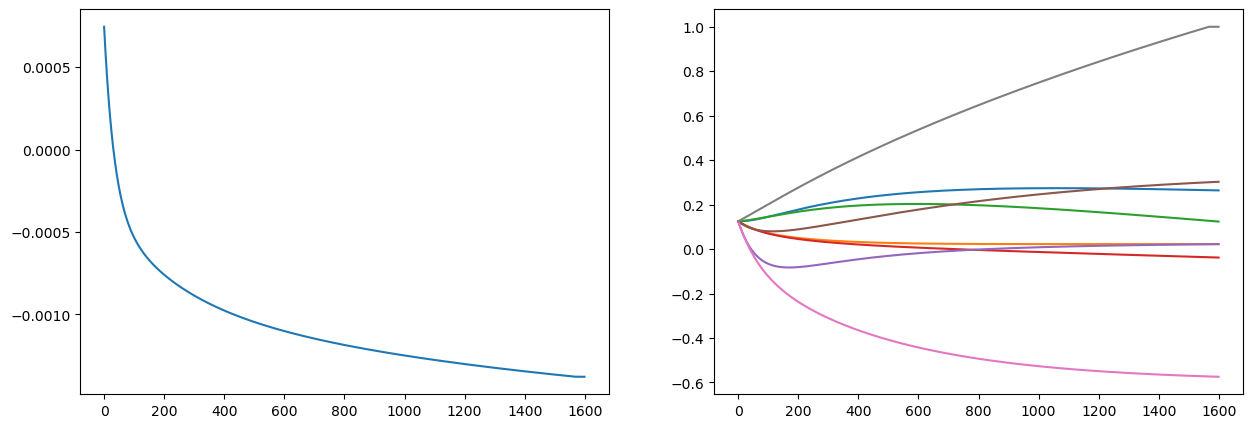

In [10]:
import matplotlib.pyplot as plt
optimalx_2_5 = xsol[iteration]
fig, plt = plt.subplots(1,2, figsize= (15, 5))
plt[0].plot(fvalsol[:iteration+1])
plt[1].plot(xsol[:iteration+1])

In [11]:
###### initialize
portfolio = np.array([1/8]*8)
N = 1600
ret = ret_train
pi = 4
theta = 1000
g = evalgrad(portfolio, ret, pi, theta)
xsol = np.zeros((N,8))
fvalsol = np.zeros(N)
newx = np.zeros(8)
for iteration in range(N):
    xsol[iteration] = portfolio
    print('\nIteration', iteration)
    fval = evalfunc(portfolio, ret, pi, theta)
    fvalsol[iteration] = fval

    t, delta = newfixedratestep(portfolio)
    
    for i in range(0,8):
        newx[i] = max(-1,portfolio[i] + t*delta[i])
        newx[i] = min(1, newx[i])
                
    newfval = evalfunc(newx, ret, pi, theta)
    portfolio = newx


Iteration 0
starting backtrack at x = (1.250e-01, 1.250e-01, 1.250e-01, 1.250e-01, 1.250e-01, 1.250e-01, 1.250e-01, 1.250e-01*8), f = 3.2352e-04 
  and grad = (-2.666e-04, 5.177e-04, -2.770e-04, 4.172e-04, 2.209e-03, 3.537e-04, 2.650e-03, -8.768e-04*8) and delta = (2.666e-04, -5.177e-04, 2.770e-04, -4.172e-04, -2.209e-03, -3.537e-04, -2.650e-03, 8.768e-04*8)
grad times delta = -1.3387e-05
at t = 1.0000e+00, newx = (1.253e-01, 1.245e-01, 1.253e-01, 1.246e-01, 1.228e-01, 1.246e-01, 1.223e-01, 1.259e-01) and f = 3.1019e-04
 so function change = -1.3331e-05 and target -6.6937e-06
done!
  got t = 1.0000e+00

Iteration 1
starting backtrack at x = (1.253e-01, 1.245e-01, 1.253e-01, 1.246e-01, 1.228e-01, 1.246e-01, 1.223e-01, 1.259e-01*8), f = 3.1019e-04 
  and grad = (-2.776e-04, 5.122e-04, -2.843e-04, 4.136e-04, 2.182e-03, 3.447e-04, 2.631e-03, -8.792e-04*8) and delta = (2.776e-04, -5.122e-04, 2.843e-04, -4.136e-04, -2.182e-03, -3.447e-04, -2.631e-03, 8.792e-04*8)
grad times delta = -1.3165e

starting backtrack at x = (2.297e-01, 5.900e-02, 2.116e-01, 6.759e-02, -1.369e-01, 1.075e-01, -2.592e-01, 2.967e-01*8), f = -1.1839e-03 
  and grad = (-5.953e-04, 2.982e-04, -4.764e-04, 2.646e-04, 1.063e-03, -7.008e-06, 1.837e-03, -9.206e-04*8) and delta = (5.953e-04, -2.982e-04, 4.764e-04, -2.646e-04, -1.063e-03, 7.008e-06, -1.837e-03, 9.206e-04*8)
grad times delta = -6.0917e-06
at t = 1.0000e+00, newx = (2.303e-01, 5.870e-02, 2.121e-01, 6.733e-02, -1.379e-01, 1.075e-01, -2.610e-01, 2.976e-01) and f = -1.1900e-03
 so function change = -6.0838e-06 and target -3.0459e-06
done!
  got t = 1.0000e+00

Iteration 184
starting backtrack at x = (2.303e-01, 5.870e-02, 2.121e-01, 6.733e-02, -1.379e-01, 1.075e-01, -2.610e-01, 2.976e-01*8), f = -1.1900e-03 
  and grad = (-5.942e-04, 2.974e-04, -4.755e-04, 2.639e-04, 1.057e-03, -8.391e-06, 1.833e-03, -9.198e-04*8) and delta = (5.942e-04, -2.974e-04, 4.755e-04, -2.639e-04, -1.057e-03, 8.391e-06, -1.833e-03, 9.198e-04*8)
grad times delta = -6.0599e-0

starting backtrack at x = (3.234e-01, 2.209e-02, 2.862e-01, 3.423e-02, -2.064e-01, 1.424e-01, -5.136e-01, 4.574e-01*8), f = -1.8254e-03 
  and grad = (-3.865e-04, 1.001e-04, -3.040e-04, 9.364e-05, -2.161e-04, -3.279e-04, 8.805e-04, -7.599e-04*8) and delta = (3.865e-04, -1.001e-04, 3.040e-04, -9.364e-05, 2.161e-04, 3.279e-04, -8.805e-04, 7.599e-04*8)
grad times delta = -1.7675e-06
at t = 1.0000e+00, newx = (3.238e-01, 2.199e-02, 2.865e-01, 3.414e-02, -2.062e-01, 1.427e-01, -5.144e-01, 4.582e-01) and f = -1.8271e-03
 so function change = -1.7661e-06 and target -8.8373e-07
done!
  got t = 1.0000e+00

Iteration 376
starting backtrack at x = (3.238e-01, 2.199e-02, 2.865e-01, 3.414e-02, -2.062e-01, 1.427e-01, -5.144e-01, 4.582e-01*8), f = -1.8271e-03 
  and grad = (-3.855e-04, 9.954e-05, -3.032e-04, 9.312e-05, -2.192e-04, -3.287e-04, 8.777e-04, -7.592e-04*8) and delta = (3.855e-04, -9.954e-05, 3.032e-04, -9.312e-05, 2.192e-04, 3.287e-04, -8.777e-04, 7.592e-04*8)
grad times delta = -1.7620e-0


Iteration 566
starting backtrack at x = (3.825e-01, 8.866e-03, 3.315e-01, 2.205e-02, -1.366e-01, 2.114e-01, -6.506e-01, 5.933e-01*8), f = -2.1040e-03 
  and grad = (-2.448e-04, 5.130e-05, -1.796e-04, 4.624e-05, -4.235e-04, -3.691e-04, 6.146e-04, -6.720e-04*8) and delta = (2.448e-04, -5.130e-05, 1.796e-04, -4.624e-05, 4.235e-04, 3.691e-04, -6.146e-04, 6.720e-04*8)
grad times delta = -1.2418e-06
at t = 1.0000e+00, newx = (3.828e-01, 8.815e-03, 3.317e-01, 2.201e-02, -1.362e-01, 2.118e-01, -6.512e-01, 5.940e-01) and f = -2.1052e-03
 so function change = -1.2414e-06 and target -6.2092e-07
done!
  got t = 1.0000e+00

Iteration 567
starting backtrack at x = (3.828e-01, 8.815e-03, 3.317e-01, 2.201e-02, -1.362e-01, 2.118e-01, -6.512e-01, 5.940e-01*8), f = -2.1052e-03 
  and grad = (-2.442e-04, 5.118e-05, -1.791e-04, 4.613e-05, -4.236e-04, -3.690e-04, 6.139e-04, -6.717e-04*8) and delta = (2.442e-04, -5.118e-05, 1.791e-04, -4.613e-05, 4.236e-04, 3.690e-04, -6.139e-04, 6.717e-04*8)
grad times del

starting backtrack at x = (4.190e-01, 1.228e-03, 3.569e-01, 1.481e-02, -6.115e-02, 2.759e-01, -7.514e-01, 7.100e-01*8), f = -2.3017e-03 
  and grad = (-1.631e-04, 3.365e-05, -1.063e-04, 3.608e-05, -4.006e-04, -3.392e-04, 5.039e-04, -6.198e-04*8) and delta = (1.631e-04, -3.365e-05, 1.063e-04, -3.608e-05, 4.006e-04, 3.392e-04, -5.039e-04, 6.198e-04*8)
grad times delta = -9.5408e-07
at t = 1.0000e+00, newx = (4.191e-01, 1.194e-03, 3.570e-01, 1.477e-02, -6.075e-02, 2.762e-01, -7.519e-01, 7.106e-01) and f = -2.3026e-03
 so function change = -9.5373e-07 and target -4.7704e-07
done!
  got t = 1.0000e+00

Iteration 748
starting backtrack at x = (4.191e-01, 1.194e-03, 3.570e-01, 1.477e-02, -6.075e-02, 2.762e-01, -7.519e-01, 7.106e-01*8), f = -2.3026e-03 
  and grad = (-1.628e-04, 3.356e-05, -1.060e-04, 3.605e-05, -4.004e-04, -3.390e-04, 5.034e-04, -6.196e-04*8) and delta = (1.628e-04, -3.356e-05, 1.060e-04, -3.605e-05, 4.004e-04, 3.390e-04, -5.034e-04, 6.196e-04*8)
grad times delta = -9.5267e-0

starting backtrack at x = (4.450e-01, -3.678e-03, 3.724e-01, 7.742e-03, 1.350e-02, 3.391e-01, -8.420e-01, 8.299e-01*8), f = -2.4669e-03 
  and grad = (-9.874e-05, 1.499e-05, -5.035e-05, 3.543e-05, -3.384e-04, -2.876e-04, 3.982e-04, -5.738e-04*8) and delta = (9.874e-05, -1.499e-05, 5.035e-05, -3.543e-05, 3.384e-04, 2.876e-04, -3.982e-04, 5.738e-04*8)
grad times delta = -6.9881e-07
at t = 1.0000e+00, newx = (4.451e-01, -3.693e-03, 3.725e-01, 7.707e-03, 1.384e-02, 3.394e-01, -8.424e-01, 8.304e-01) and f = -2.4676e-03
 so function change = -6.9853e-07 and target -3.4941e-07
done!
  got t = 1.0000e+00

Iteration 949
starting backtrack at x = (4.451e-01, -3.693e-03, 3.725e-01, 7.707e-03, 1.384e-02, 3.394e-01, -8.424e-01, 8.304e-01*8), f = -2.4676e-03 
  and grad = (-9.846e-05, 1.489e-05, -5.011e-05, 3.545e-05, -3.381e-04, -2.873e-04, 3.977e-04, -5.736e-04*8) and delta = (9.846e-05, -1.489e-05, 5.011e-05, -3.545e-05, 3.381e-04, 2.873e-04, -3.977e-04, 5.736e-04*8)
grad times delta = -6.9769e-0

starting backtrack at x = (4.592e-01, -4.855e-03, 3.780e-01, 4.237e-04, 7.287e-02, 3.900e-01, -9.107e-01, 9.384e-01*8), f = -2.5841e-03 
  and grad = (-4.730e-05, -2.839e-06, -7.836e-06, 3.979e-05, -2.665e-04, -2.308e-04, 3.042e-04, -5.339e-04*8) and delta = (4.730e-05, 2.839e-06, 7.836e-06, -3.979e-05, 2.665e-04, 2.308e-04, -3.042e-04, 5.339e-04*8)
grad times delta = -5.0574e-07
at t = 1.0000e+00, newx = (4.593e-01, -4.852e-03, 3.780e-01, 3.839e-04, 7.314e-02, 3.902e-01, -9.110e-01, 9.389e-01) and f = -2.5846e-03
 so function change = -5.0553e-07 and target -2.5287e-07
done!
  got t = 1.0000e+00

Iteration 1145
starting backtrack at x = (4.593e-01, -4.852e-03, 3.780e-01, 3.839e-04, 7.314e-02, 3.902e-01, -9.110e-01, 9.389e-01*8), f = -2.5846e-03 
  and grad = (-4.706e-05, -2.926e-06, -7.639e-06, 3.981e-05, -2.661e-04, -2.305e-04, 3.037e-04, -5.337e-04*8) and delta = (4.706e-05, 2.926e-06, 7.639e-06, -3.981e-05, 2.661e-04, 2.305e-04, -3.037e-04, 5.337e-04*8)
grad times delta = -5.0490e-

at t = 1.0000e+00, newx = (4.645e-01, -3.129e-03, 3.768e-01, -7.515e-03, 1.153e-01, 4.276e-01, -9.603e-01, 1.001e+00) and f = -2.6480e-03
 so function change = -3.8935e-07 and target -1.9475e-07
done!
  got t = 1.0000e+00

Iteration 1329
starting backtrack at x = (4.645e-01, -3.129e-03, 3.768e-01, -7.515e-03, 1.153e-01, 4.276e-01, -9.603e-01, 1.000e+00*8), f = -2.6477e-03 
  and grad = (-1.963e-05, -1.228e-05, 1.082e-05, 4.666e-05, -1.832e-04, -1.726e-04, 2.437e-04, -5.134e-04*8) and delta = (1.963e-05, 1.228e-05, -1.082e-05, -4.666e-05, 1.832e-04, 1.726e-04, -2.437e-04, 5.134e-04*8)
grad times delta = -3.8912e-07
at t = 1.0000e+00, newx = (4.646e-01, -3.116e-03, 3.768e-01, -7.562e-03, 1.155e-01, 4.278e-01, -9.605e-01, 1.001e+00) and f = -2.6481e-03
 so function change = -3.8896e-07 and target -1.9456e-07
done!
  got t = 1.0000e+00

Iteration 1330
starting backtrack at x = (4.646e-01, -3.116e-03, 3.768e-01, -7.562e-03, 1.155e-01, 4.278e-01, -9.605e-01, 1.000e+00*8), f = -2.6478e-03 
  

starting backtrack at x = (4.674e-01, -5.241e-04, 3.751e-01, -1.594e-02, 1.423e-01, 4.540e-01, -9.993e-01, 1.000e+00*8), f = -2.6648e-03 
  and grad = (-1.202e-05, -1.755e-05, 9.349e-06, 4.689e-05, -1.256e-04, -1.265e-04, 1.920e-04, -5.126e-04*8) and delta = (1.202e-05, 1.755e-05, -9.349e-06, -4.689e-05, 1.256e-04, 1.265e-04, -1.920e-04, 5.126e-04*8)
grad times delta = -3.3410e-07
at t = 1.0000e+00, newx = (4.674e-01, -5.065e-04, 3.751e-01, -1.598e-02, 1.424e-01, 4.541e-01, -9.995e-01, 1.001e+00) and f = -2.6652e-03
 so function change = -3.3397e-07 and target -1.6705e-07
done!
  got t = 1.0000e+00

Iteration 1508
starting backtrack at x = (4.674e-01, -5.065e-04, 3.751e-01, -1.598e-02, 1.424e-01, 4.541e-01, -9.995e-01, 1.000e+00*8), f = -2.6649e-03 
  and grad = (-1.198e-05, -1.758e-05, 9.350e-06, 4.688e-05, -1.254e-04, -1.263e-04, 1.917e-04, -5.125e-04*8) and delta = (1.198e-05, 1.758e-05, -9.350e-06, -4.688e-05, 1.254e-04, 1.263e-04, -1.917e-04, 5.125e-04*8)
grad times delta = -3.338

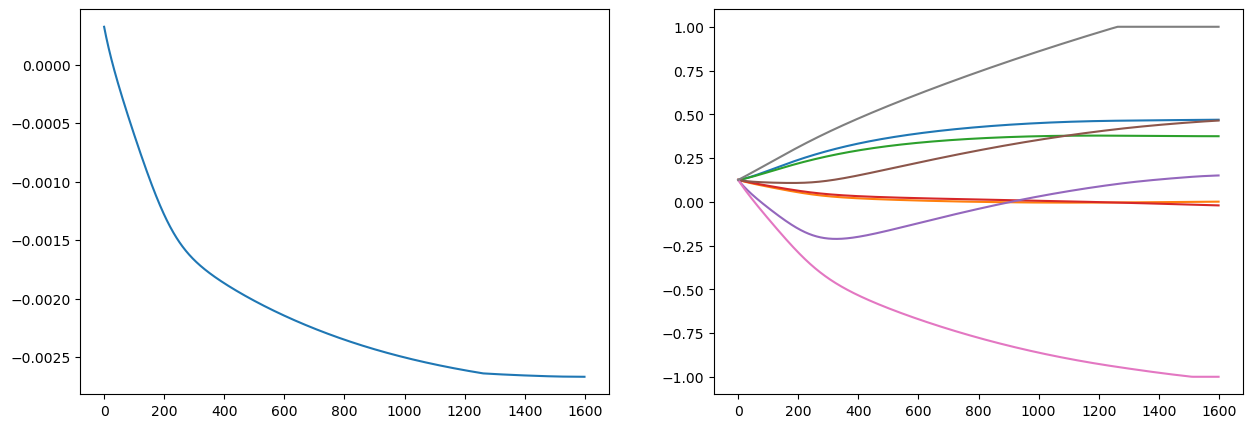

In [12]:
import matplotlib.pyplot as plt
fig, plt = plt.subplots(1,2, figsize= (15, 5))
plt[0].plot(fvalsol[:iteration+1])
plt[1].plot(xsol[:iteration+1])

# Extra Credit

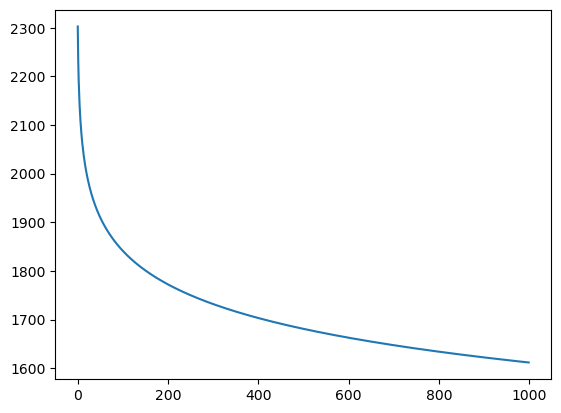

In [13]:
# Barrier function
import matplotlib.pyplot as plt
x = 1e-10*(1+np.arange(1000))
lambdaval = 100
y = -lambdaval*np.log(x)
plt.plot(y)
plt.show()

In [14]:
def evalfunc_barrier(portfolio, ret, pi, theta, lambdaval):
    # compute mean returns first. ret_mu shape should be (3,)
    ret_mu = ret.mean(axis=0)

    # first part
    drift = -ret_mu.dot(portfolio)

    # second part
    # weighed deviation from mean (part within []^pi)
    deviation = (ret - ret_mu).dot(portfolio)
    risk = theta * (
        (np.abs(deviation)**pi).mean()
    )
    barrier = -lambdaval*np.log(0.5 * np.sum(np.abs(optimalx_2_5)) - np.sum(np.abs(portfolio)))
    return drift + risk + barrier, barrier

def evalgrad_barrier(portfolio, ret, pi, theta, lambdaval):
    T = ret.shape[0]
    ret_mu = ret.mean(axis=0)
    delta = ret - ret_mu
    dev = delta.dot(portfolio)
    nom = dev * np.absolute(dev)**(pi-2)
    slack = 0.5 * np.sum(np.abs(optimalx_2_5)) - np.sum(np.abs(portfolio))
    return -ret_mu + (
        (theta * pi/ T)*nom
    ).dot(delta)- lambdaval/slack, slack 

    e1 = np.exp(x1 + 3*x2 - 0.1)
    e2 = np.exp(x1 - x2 - 0.1)
    e3 = np.exp(-0.1*x1 - 0.1)
    slack = x1 + x2 - 0.8
    g1 = e1 + e2 - 0.1*e3 - lambdaval/slack
    g2 = 3*e1 - e2 - lambdaval/slack
    return g1, g2, slack